<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/trabalho-UERJ-analise-de-dados/blob/main/hitograma_fisica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [24]:
with open('/content/drive/MyDrive/fis hist/relação peso massa e altura - Respostas ao formulário 1.csv','r') as f:
  bruteDf = pd.read_csv(f)

In [75]:
df = bruteDf.drop(columns=['Carimbo de data/hora'])
df

,Sexo,Pratica atividade física quantas vezes por semana,Altura (em cm),Peso (em kg),Qual a sua idade
0,Masculino,6,175,76,18
1,Masculino,5,177,69,18
2,Femenino,3,151,50,17
3,Masculino,6,182,82,22
4,Masculino,4,166,67,19
5,Femenino,3,"1,65",57,18
6,Femenino,5,"1,7",80,48
7,Masculino,1,1073,"78,5",22
8,Masculino,2,173,59,19
9,Masculino,4,"1,77",85,20


In [51]:
mascData, femData = df[df['Sexo '] == 'Masculino'], df[df['Sexo '] == 'Feminino']

In [54]:
mascData = mascData.drop(columns = ['Sexo '])
femData = femData.drop(columns = ['Sexo '])

In [68]:
[alturasMb , pesosMb, idadesMb] = [
    mascData['Altura (em cm)'].values,
    mascData['Peso (em kg)'].values,
    mascData['Qual a sua idade'].values,
    ]

In [91]:
def correctHight(h):
  hightWithoutVirgle = int(h.replace(',',''))
  return hightWithoutVirgle if hightWithoutVirgle < 1000 else int(h.replace('0', ''))

inting = lambda arraio : list(map(lambda x:int(x),arraio))

In [97]:
alturasM = inting(list(map(correctHight,alturasMb)))
alturasM[-4] = 180
print(alturasM)
pesosMb[4] = 78
pesosM = inting(pesosMb)
print(pesosM)
idadesM = inting(idadesMb)
print(idadesMb)

[175, 177, 182, 166, 173, 173, 177, 180, 184, 171, 174, 161, 171, 173, 178, 180, 183, 178, 178]
[76, 69, 82, 67, 78, 59, 85, 110, 70, 88, 80, 60, 77, 74, 70, 76, 95, 72, 63]
[18 18 22 19 22 19 20 19 19 51 24 18 21 19 19 19 18 19 19]


In [98]:
mascDf = pd.DataFrame(np.c_[alturasM, pesosM,idadesM], columns=['altura', 'peso', 'idade'])

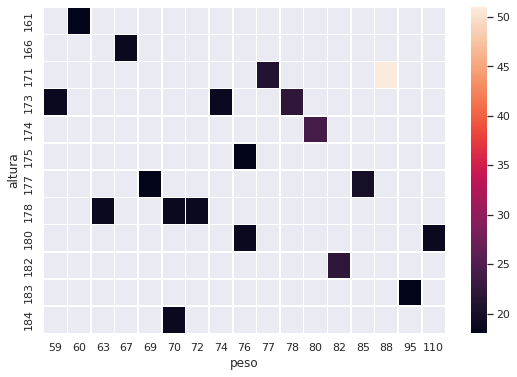

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

piv = mascDf.pivot('altura','peso', 'idade')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(piv, linewidths=.5, ax=ax)